In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Descriptive Statistics
Below you can see some descriptive statistics on the training data.  We can see that the numeric variables are all well populated and for the most part have good variation.  Some of the categorical variables however have low record counts or little variation.

Condition1 and Condition2 for example have many unique values but the overwhelming majority are "Norm" (1260 and 1445).  Many other variables show a similar pattern with heavily skewed values to 1 variable and may not be very helpful in us predicting the price because of such little variation.

We also have some record counts with very little populated values such as PoolQC and MiscFeature having only 7 and 54 records populated respectively.  Variables such as these might be useful in predicting large outliers in data to rare features about a particular house.


In [2]:
pd.set_option('display.max_columns' , 50)

## Describe all numeric variables
df.describe(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
## Describe all categorical variables
df.describe(include = [object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


# Plotting Distributions of Some Key Variables
Below are some distribution plots of the variables that are likely key to this analysis.  I focused in on square footage and neighborhood generally as the two biggest drivers of the sale price.  Obviously other variable will have a factor but these are the ones I think are most significant.  For the neighborhood variable we can see a pretty good variation across a number of neighborhoods which should be good for our analysis.

The numeric variables, including sale price all have a fairly large right skew.  We would expect to see the skew of the square footage and the price to be approximately the same which we do here.  The lot values are very skewed and we may have to do something about that using linear regression because of the large outliers.

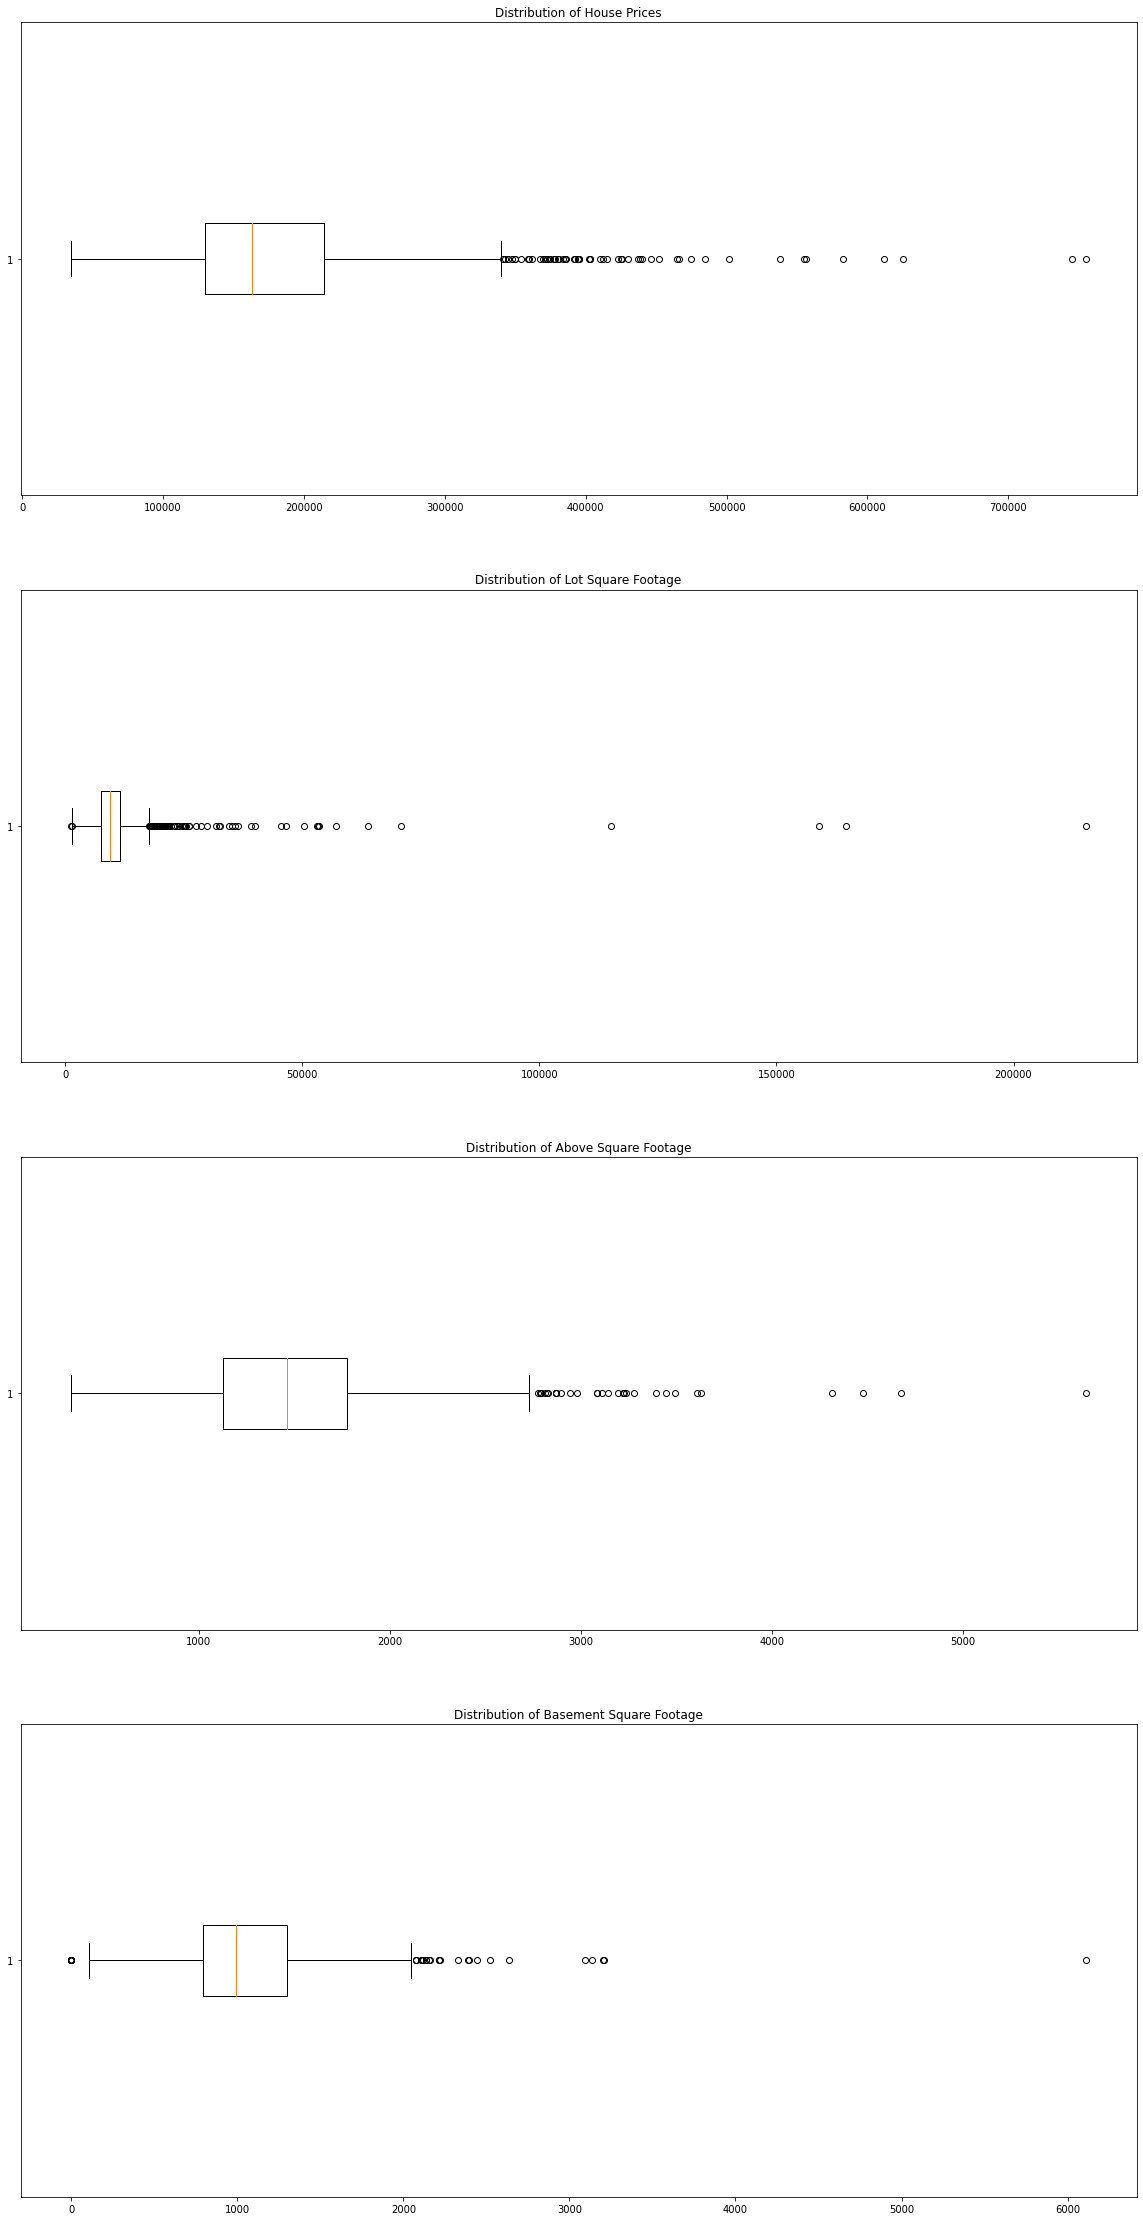

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline


## Create figure for multiple plots showing sale price lot area above grade living area and basement area
fig , ax = plt.subplots(4, 1 , figsize = (20,40))
ax[0].boxplot(df['SalePrice'] , vert = False)
ax[0].set_title('Distribution of House Prices')
ax[1].boxplot(df['LotArea'] , vert = False)
ax[1].set_title('Distribution of Lot Square Footage')
ax[2].boxplot(df['GrLivArea'] , vert = False)
ax[2].set_title('Distribution of Above Square Footage')
ax[3].boxplot(df['TotalBsmtSF'] , vert = False)
ax[3].set_title('Distribution of Basement Square Footage')

plt.show()

<AxesSubplot:>

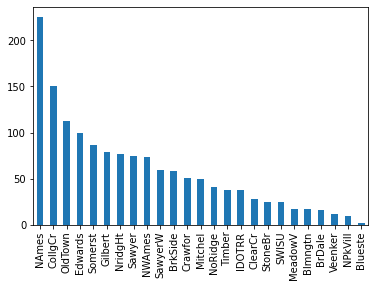

In [5]:
# Plot the counts of each neighborhood
df['Neighborhood'].value_counts().plot(kind = 'bar')

# Comparing Sale Price to Some Key Variables
Below are some plots which compare some of the key variables above too the sale price to start to highlight a picture of how the 2 might be related.  We can see that the total square footage and the sale price are highly correlated.  The relationship wjth the lotsize is much less clear since they are bunched towards the lower end with some noticeable outliers.

The plots comparing sale price and size in the different neighborhoods are much more interesting to me.  We can see sale price varies significantly across the different neighborhoods and even though there is some correlation to the lot size and square footage there are certain neighborhoods that break this trend and it shows us that there is more driving the sale price in some of these neighborhoods then just size.

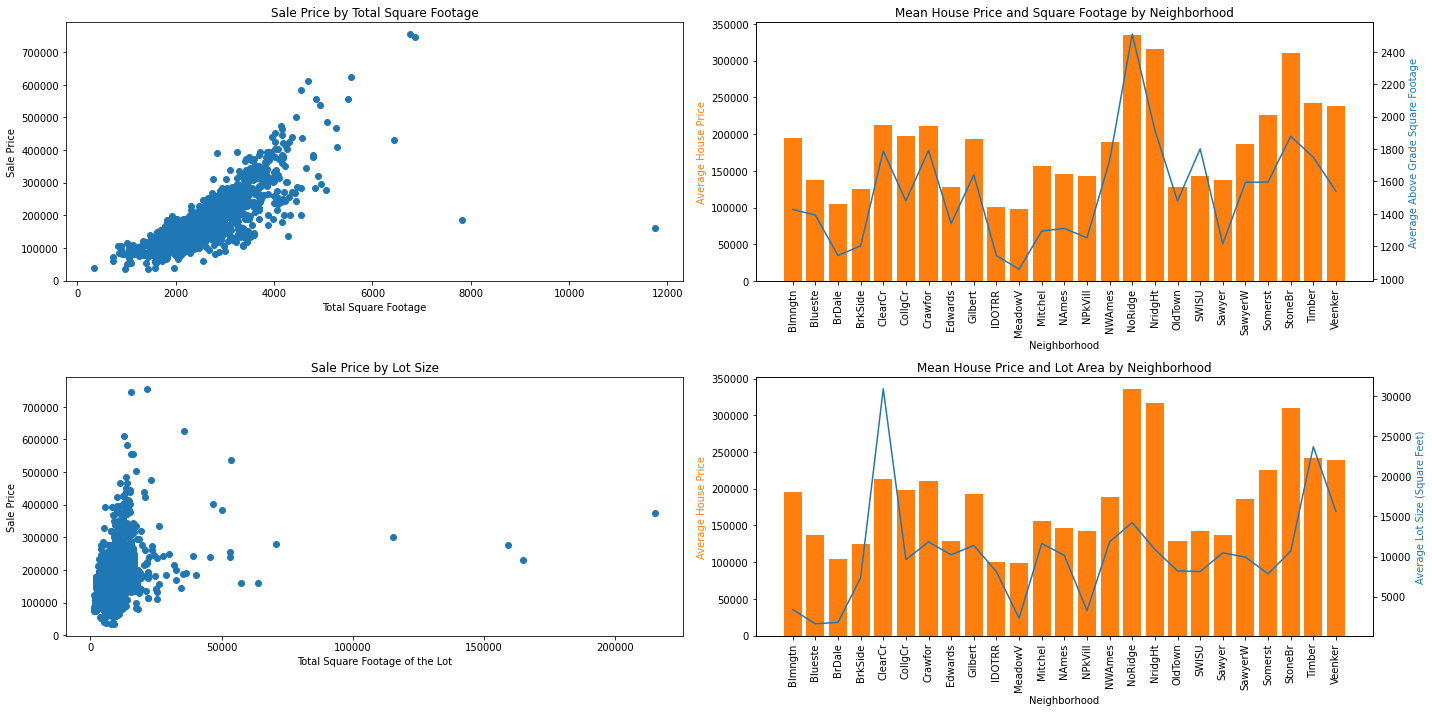

In [6]:
fig , ax = plt.subplots(2 , 2 , figsize = (20 , 10))

ax[0,0].scatter(df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] , df['SalePrice'] )
ax[0,0].set_xlabel('Total Square Footage')
ax[0,0].set_ylabel('Sale Price')
ax[0,0].set_title('Sale Price by Total Square Footage')

ax[1,0].scatter(df['LotArea'] , df['SalePrice'] )
ax[1,0].set_xlabel('Total Square Footage of the Lot')
ax[1,0].set_ylabel('Sale Price')
ax[1,0].set_title('Sale Price by Lot Size')

bars = df.groupby('Neighborhood')[['SalePrice','GrLivArea']].mean()
x = np.arange(len(bars.index))
ax[0,1].bar(x , height = bars.SalePrice.values , color = 'tab:orange')
ax[0,1].set_xlabel('Neighborhood')
ax[0,1].set_ylabel('Average House Price' , color ='tab:orange')
ax[0,1].set_title('Mean House Price and Square Footage by Neighborhood')
ax[0,1].set_xticks(x, bars.index , rotation = 90)
ax2 = ax[0,1].twinx()
ax2.plot(x , bars.GrLivArea.values , color = 'tab:blue' )
ax2.set_ylabel('Average Above Grade Square Footage' , color = 'tab:blue')

bars = df.groupby('Neighborhood')[['SalePrice','LotArea']].mean()
x = np.arange(len(bars.index))
ax[1,1].bar(x , height = bars.SalePrice.values , color = 'tab:orange')
ax[1,1].set_xlabel('Neighborhood')
ax[1,1].set_ylabel('Average House Price' , color ='tab:orange')
ax[1,1].set_title('Mean House Price and Lot Area by Neighborhood')
ax[1,1].set_xticks(x, bars.index , rotation = 90)
ax2 = ax[1,1].twinx()
ax2.plot(x , bars.LotArea.values , color = 'tab:blue')
ax2.set_ylabel('Average Lot Size (Square Feet)' , color = 'tab:blue')



fig.tight_layout()

# Comparing Sale Price to Some Not So Key Variables

Some data choices can help with our feature engineering.  We have some issues with Null Values in the numeric variables and we need to decide how to treat these.  Null values are not a problem with the categorical variables based on the way the regression will be run but with the numeric variables it is a bit more complex.  We could just set them to 0 but we need to understand if this is actually a valid way to fix the issue.  The below analysis deals with the 3 numeric variables with 0 values. (LotFrontage, MasVnrArea and GarageYrBlt)



### Lot Frontage
This variable makes sense to fill the NA values with 0.  We assume that a property with no popluated value has no lot frontage and therefore is just 0.  The question however is does lot frontage have value regardless of size?  In order to account for this we can include an indicator variable for lot frontage which seperates the effect of having lot frontage and the size in the regression.

In [7]:
fig = plt.figure(  figsize = (15 , 30))
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['LotFrontageInd'] = np.where(df['LotFrontage'] > 0 , "Includes Lot Frontage" , "No Lot Frontage")

<Figure size 1080x2160 with 0 Axes>

### MasVnrArea/MasVnrType
This data is not going to fit into our regression very well due to some null values as well as many 0's. Using the scatter we can see there isn't much of a connection between Masonry Veneer Area and sale price.  This doesn't necessarily mean that it doesn't have predictive power but it is unlikely unless it has a strong interaction with another.
We can see that Masonry Veneer type has some differences in price where but even when we plot the size for each indivdual type by square footage we don't see a clear trend of size connected to price. 
From the points above we can safely assume that we don't add by much MasVnrArea and can safely drop it from our analysis.

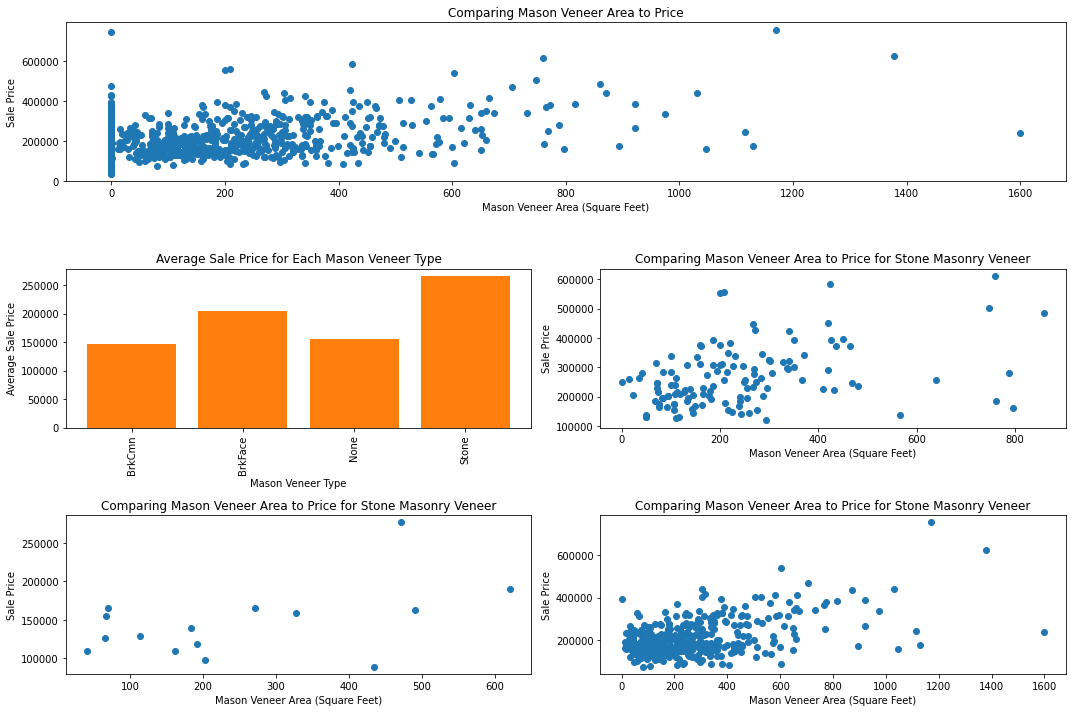

In [8]:
fig = plt.figure(  figsize = (15 , 10))
plt.subplot(3,1,1)
plt.scatter(df['MasVnrArea'] , df['SalePrice'])
plt.xlabel('Mason Veneer Area (Square Feet)')
plt.ylabel('Sale Price')
plt.title('Comparing Mason Veneer Area to Price')

bars = df.groupby('MasVnrType')['SalePrice'].mean()
x = np.arange(len(bars.index))
plt.subplot(3,2,3)
plt.bar(x , height = bars.values , color = 'tab:orange' )
plt.xlabel('Mason Veneer Type')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price for Each Mason Veneer Type')
plt.xticks(x, bars.index, rotation =90)

plt.subplot(3,2,4)
plt.scatter(df[df['MasVnrType'] == 'Stone']['MasVnrArea'] , df[df['MasVnrType'] == 'Stone']['SalePrice'])
plt.xlabel('Mason Veneer Area (Square Feet)')
plt.ylabel('Sale Price')
plt.title('Comparing Mason Veneer Area to Price for Stone Masonry Veneer')

plt.subplot(3,2,5)
plt.scatter(df[df['MasVnrType'] == 'BrkCmn']['MasVnrArea'] , df[df['MasVnrType'] == 'BrkCmn']['SalePrice'])
plt.xlabel('Mason Veneer Area (Square Feet)')
plt.ylabel('Sale Price')
plt.title('Comparing Mason Veneer Area to Price for Stone Masonry Veneer')

plt.subplot(3,2,6)
plt.scatter(df[df['MasVnrType'] == 'BrkFace']['MasVnrArea'] , df[df['MasVnrType'] == 'BrkFace']['SalePrice'])
plt.xlabel('Mason Veneer Area (Square Feet)')
plt.ylabel('Sale Price')
plt.title('Comparing Mason Veneer Area to Price for Stone Masonry Veneer')

fig.tight_layout()

### Year Garage Was Built

This one we don't necessarily know if it could have an effect.  We see an upward trend of garage year built compared to sale price in the scatter plot but it is also very closely related to the year built of the home.  We can see this from the set of first 3 scatter plots.  

One possible valuable piece of information here is that a newly built garage can affect the value of the home so we can compare the year built of the home to the year built of the garage to get a new variable that tells us if a garage has been updated or added to the home.

Since Some homes may not have a garage the best way to visualize this is based on garage type and we can see some meaningful differences in the average price whether a garage was newly built or the original garage.  Noteably newly built basement and builtin garages add a lot of value.  However, there is not much difference between newly built and original in the attached and detached records which are the large majority.  Still seems like there could be some valuable explanatory power in having the new garage variable.

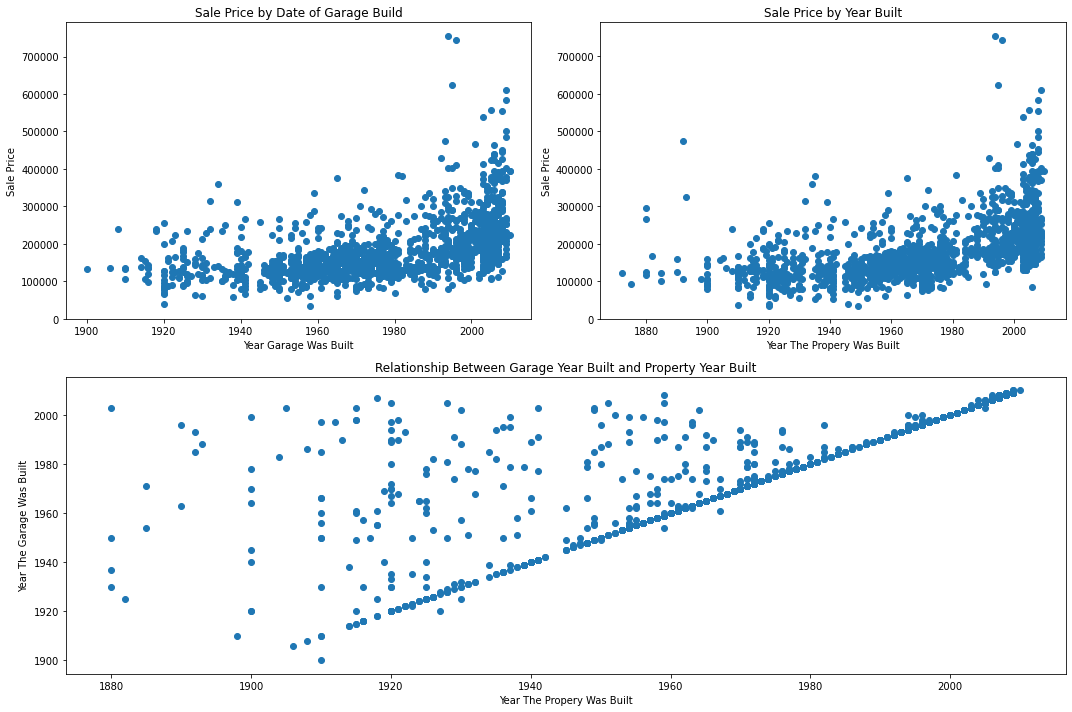

In [9]:
fig = plt.figure(figsize = (15 , 10))
plt.subplot(2,2,1)
plt.scatter(df['GarageYrBlt'] , df['SalePrice'])
plt.xlabel('Year Garage Was Built')
plt.ylabel('Sale Price')
plt.title('Sale Price by Date of Garage Build')

plt.subplot(2,2,2)
plt.scatter(df['YearBuilt'] , df['SalePrice'])
plt.xlabel('Year The Propery Was Built')
plt.ylabel('Sale Price')
plt.title('Sale Price by Year Built')

plt.subplot(2,1,2)
plt.scatter(df['YearBuilt'] , df['GarageYrBlt'])
plt.xlabel('Year The Propery Was Built')
plt.ylabel('Year The Garage Was Built')
plt.title('Relationship Between Garage Year Built and Property Year Built')

fig.tight_layout()

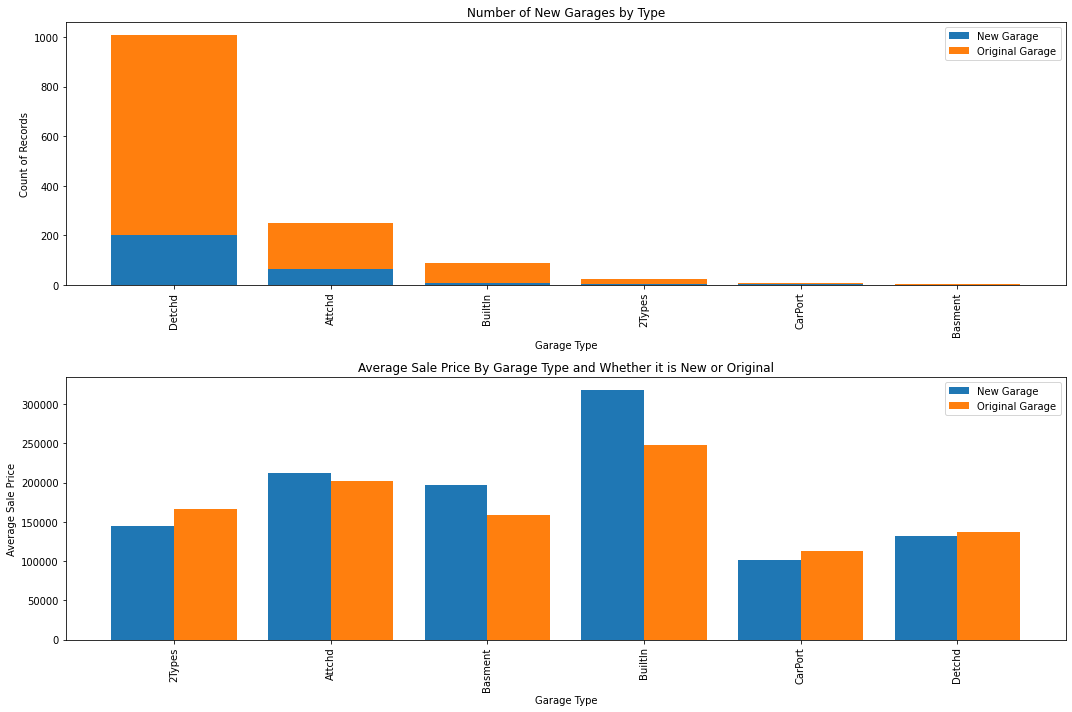

In [10]:
## Create the new variable for the garage year built
df['NewGarage'] = np.where(df['GarageYrBlt'] - df['YearBuilt'] > 0 , "New" , "Original")

fig = plt.figure(figsize = (15 , 10))
botbars = df[df['NewGarage'] == 'New']['GarageType'].value_counts()
topbars = df[df['NewGarage'] == 'Original']['GarageType'].value_counts()
x=np.arange(len(botbars.index))

plt.subplot(2,1,1)
plt.bar(x ,  botbars )
plt.bar(x , topbars , bottom = botbars )
plt.xlabel('Garage Type')
plt.ylabel('Count of Records')
plt.title('Number of New Garages by Type')
plt.xticks(x, botbars.index, rotation =90)
plt.legend(['New Garage' , 'Original Garage'])


botbars = df[df['NewGarage'] == 'New'].groupby('GarageType')['SalePrice'].mean()
topbars = df[df['NewGarage'] == 'Original'].groupby('GarageType')['SalePrice'].mean()

plt.subplot(2,1,2)
plt.bar(x-0.2 , botbars, width = 0.4)
plt.bar(x+0.2 , topbars , width = 0.4)
plt.xlabel('Garage Type')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price By Garage Type and Whether it is New or Original')
plt.xticks(x , botbars.index , rotation = 90)
plt.legend(['New Garage' , 'Original Garage'])
fig.tight_layout()
plt.show()

# Feature Engineering
A few basic steps of feature engineering the goal here is to be able to include all variables in a linear regression.  The code below creates a training and test set which can be used to evaluate the model, the training set is used to calculate the model and the test set is used to verify the results.  The next step is creating a "pipeline" which standardizes our scaler features to unit variance and mean 0 and creates a onehot encoder for our categorical variables.  This allows all of our variables to be included in the regression.  

By putting the transformation steps into a pipeline it allows us to simply put the transformation steps into any regressions we want to run.  This step has some considerations on the compute versus storage concern.  The current way requires less data to be held in memory since the transformation is done for each regression and just the variables are held in memory although is computationally heavy.  Not important for the size of data here but an important thing to remember with larger datasets.



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder

# Drop columns that aren't going to be predictors in the regression
dfx = df.drop(columns = ['Id' , 'SalePrice','MasVnrArea','GarageYrBlt'])

## Define y as sale price drop sale price, Masonry Vaneer Area and Garage Year Built from the data
x, y = dfx.values , df['SalePrice'].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3, random_state = 0)

# Define few lists that return numeric indexes of col types
num_var = [dfx.columns.get_loc(col)  for col in dfx.select_dtypes(include = np.number)]
cat_var = [dfx.columns.get_loc(col)  for col in dfx.select_dtypes(include = object)]


# Define transformers for each type of variable
num_transform = Pipeline(steps = [('scaler' , StandardScaler())])
cat_transform = Pipeline(steps = [('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                  ('onehot' , OneHotEncoder(handle_unknown = 'ignore'))])

## Use indexes and transformer to define preprocessor
preprocessor = ColumnTransformer(transformers = [('num' , num_transform , num_var) , 
                                                ('cat' , cat_transform , cat_var)])

# Modelling
The first set of models I used uses all the variables does a OneHotEncoder for the categorical variables and scales all the numeric variables to a similar scale.  There are 2 types of models we use:
1. Linear Regression with Gradient Descent
2. Random Forest

The models are close base on R squared and mean squared error calculations.  While the Random Forest Regressor can fit the training data better it does slightly worse when applied to the test data which implies there may be some overfitting involved in the model.  For this reason we select the Gradient Boosting Regression as the best choice for the model.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Starting with gradient boosting regression
ols_pipeline = Pipeline(steps = [('preprocessor' , preprocessor), ('regressor' , GradientBoostingRegressor())])
ols_model = ols_pipeline.fit(x_train , y_train)


## Evaluation metrics based on training data
y_hat = ols_model.predict(x_train)
mse_1 = mean_squared_error(np.log(y_train), np.log(y_hat))
r2_1 = r2_score(y_train, y_hat)
print("The mean squared error for the logs of the training data using Gradient Boosting Regression is: " + str(mse_1))
print("The R squared value for the training data using Gradient Bossting Regression is: " + str(r2_1))

## Evaluation metrics based on test data
y_hat = ols_model.predict(x_test)
mse_2 = mean_squared_error(np.log(y_test), np.log(y_hat))
r2_2 = r2_score(y_test, y_hat)
print("The mean squared error for the test data using Gradient Boosting Regression is: " + str(mse_2))
print("The R squared value for the test data using Gradient Bossting Regression is: " + str(r2_2))

The mean squared error for the logs of the training data using Gradient Boosting Regression is: 0.006597026532187387
The R squared value for the training data using Gradient Bossting Regression is: 0.9738349806785529
The mean squared error for the test data using Gradient Boosting Regression is: 0.015620145338170308
The R squared value for the test data using Gradient Bossting Regression is: 0.8747500407016884


In [13]:
## Now using Random Forest Regression
rf_pipeline = Pipeline(steps = [('preprocessor' , preprocessor), ('regressor' , RandomForestRegressor())])
rf_model = rf_pipeline.fit(x_train , y_train)


## Evaluation metrics based on training data
y_hat = rf_model.predict(x_train)
mse_1 = mean_squared_error(np.log(y_train), np.log(y_hat))
r2_1 = r2_score(y_train, y_hat)
print("The mean squared error for the training data using Gradient Boosting Regression is: " + str(mse_1))
print("The R squared value for the training data using Gradient Bossting Regression is: " + str(r2_1))

## Evaluation metrics based on test data
y_hat = rf_model.predict(x_test)
mse_2 = mean_squared_error(np.log(y_test), np.log(y_hat))
r2_2 = r2_score(y_test, y_hat)
print("The mean squared error for the test data using Gradient Boosting Regression is: " + str(mse_2))
print("The R squared value for the test data using Gradient Bossting Regression is: " + str(r2_2))

The mean squared error for the training data using Gradient Boosting Regression is: 0.003936849309592241
The R squared value for the training data using Gradient Bossting Regression is: 0.9807615948990855
The mean squared error for the test data using Gradient Boosting Regression is: 0.017945194390818965
The R squared value for the test data using Gradient Bossting Regression is: 0.8685773112016555


# Applying the model to the test data

In [14]:
## Loading and feature engineering steps for test datase
df_1 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

df_1['LotFrontageInd'] = np.where(df_1['LotFrontage'] > 0 , "Includes Lot Frontage" , "No Lot Frontage")
df_1['NewGarage'] = np.where(df_1['GarageYrBlt'] - df_1['YearBuilt'] > 0 , "New" , "Original")

## The test data has some null values for the numeric columns, since the columns have 0 values in the training data
##we don't expect to get bad results by filling them with 0's as this is the expected value in the training regression
## take that step here
num_col = df_1.select_dtypes(include=['number']).columns
df_1[num_col] = df_1[num_col].fillna(0)

## Drop columns we don't want and define data
test = df_1.drop(columns = ['Id' , 'MasVnrArea','GarageYrBlt'])
x = test.values
y_hat = ols_model.predict(x)

predictions = pd.DataFrame(data= {'Id' : df_1.Id , 'SalePrice' : y_hat})
predictions.to_csv('predictions.csv' , index = False)